# Notebook for Explosive Production Chemical Reaction Network

Explosive production chemical reaction: $S \xrightarrow{\theta} 2S$.

In [1]:
import sys
sys.path.append('../')

import numpy as np
import torch
import matplotlib.pyplot as plt

import neuralnetwork
import convert_csv
import generate_data
import simulation
import get_sensitivities
import get_fi
import fsp
import plot
import save_load_MDN

import seaborn
import pandas as pd
from scipy.stats import nbinom
import math
from scipy.special import comb
from typing import Tuple, Callable

from CRN3_explosive_production import propensities_explosive_production as propensities

## Import data

In [2]:
FILE_NAME = 'data'
CRN_NAME = 'explosive_production'
NUM_PARAMS = 1

In [3]:
# loading data
X_train1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train1.csv')
X_train2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train2.csv')
X_train3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train3.csv')
y_train1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train1.csv')
y_train2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train2.csv')
y_train3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train3.csv')
X_valid1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid1.csv')
X_valid2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid2.csv')
X_valid3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid3.csv')
y_valid1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid1.csv')
y_valid2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid2.csv')
y_valid3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid3.csv')
X_test = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_test.csv')
y_test = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_test.csv')

train_data1 = [X_train1, y_train1]
valid_data1 = [X_valid1, y_valid1]
train_data2 = [X_train2, y_train2]
valid_data2 = [X_valid2, y_valid2]
train_data3 = [X_train3, y_train3]
valid_data3 = [X_valid3, y_valid3]

INIT_STATE = 5

## Hyperparameters

In [4]:
LR = 0.001
BATCHSIZE = 32
N_ITER = 300
N_HIDDEN = 256
MIXTURE = 'NB'

## Choosing number of components

Neural Network created.


Training ...:  63%|██████▎   | 313/500 [06:55<04:08,  1.33s/it]


Learning rate: 0.0003125,
Train loss: 0.6530354619026184,
 Valid loss: 0.6579017043113708
Neural Network created.


Training ...:  63%|██████▎   | 317/500 [07:02<04:04,  1.33s/it]


Learning rate: 0.0003125,
Train loss: 0.6530860066413879,
 Valid loss: 0.6578897833824158
Neural Network created.


Training ...:  64%|██████▍   | 322/500 [07:28<04:07,  1.39s/it]


Learning rate: 0.0003125,
Train loss: 0.6529778242111206,
 Valid loss: 0.6578447222709656
Computed loss with 1 components - average loss = 0.12252086400985718.
Neural Network created.


Training ...:  68%|██████▊   | 338/500 [10:08<04:51,  1.80s/it]


Learning rate: 0.0003125,
Train loss: 0.3164980709552765,
 Valid loss: 0.3229506313800812
Neural Network created.


Training ...:  63%|██████▎   | 316/500 [09:44<05:40,  1.85s/it]


Learning rate: 0.0003125,
Train loss: 0.3160957396030426,
 Valid loss: 0.3225390911102295
Neural Network created.


Training ...:  64%|██████▍   | 322/500 [09:12<05:05,  1.72s/it]


Learning rate: 0.0003125,
Train loss: 0.3163357377052307,
 Valid loss: 0.3227863013744354
Computed loss with 2 components - average loss = 0.0999929408232371.
Neural Network created.


Training ...:  65%|██████▌   | 327/500 [15:22<08:07,  2.82s/it]


Learning rate: 0.0003125,
Train loss: 0.22028137743473053,
 Valid loss: 0.22607049345970154
Neural Network created.


Training ...:  66%|██████▌   | 331/500 [13:19<06:48,  2.41s/it]


Learning rate: 0.0003125,
Train loss: 0.2205629199743271,
 Valid loss: 0.2263190895318985
Neural Network created.


Training ...:  66%|██████▌   | 331/500 [12:43<06:29,  2.31s/it]


Learning rate: 0.0003125,
Train loss: 0.2202664315700531,
 Valid loss: 0.22601746022701263
Computed loss with 3 components - average loss = 0.09102818369865417.
Neural Network created.


Training ...:  65%|██████▌   | 325/500 [13:49<07:26,  2.55s/it]


Learning rate: 0.0003125,
Train loss: 0.18447169661521912,
 Valid loss: 0.19048289954662323
Neural Network created.


Training ...:  65%|██████▌   | 327/500 [14:18<07:34,  2.62s/it]


Learning rate: 0.0003125,
Train loss: 0.18452739715576172,
 Valid loss: 0.19042375683784485
Neural Network created.


Training ...:  65%|██████▌   | 326/500 [14:17<07:37,  2.63s/it]


Learning rate: 0.0003125,
Train loss: 0.18447917699813843,
 Valid loss: 0.1903834491968155
Computed loss with 4 components - average loss = 0.08683555324872334.
Neural Network created.


Training ...:  68%|██████▊   | 338/500 [16:38<07:58,  2.95s/it]


Learning rate: 0.0003125,
Train loss: 0.16916844248771667,
 Valid loss: 0.17493797838687897
Neural Network created.


Training ...:  69%|██████▉   | 346/500 [40:13<17:54,  6.98s/it]    


Learning rate: 0.0003125,
Train loss: 0.16917014122009277,
 Valid loss: 0.17490096390247345
Neural Network created.


Training ...:  71%|███████▏  | 357/500 [17:46<07:07,  2.99s/it]


Learning rate: 0.0003125,
Train loss: 0.16908501088619232,
 Valid loss: 0.1748511642217636
Computed loss with 5 components - average loss = 0.08468545476595561.
Neural Network created.


Training ...:  63%|██████▎   | 315/500 [17:56<10:31,  3.42s/it]


Learning rate: 0.0003125,
Train loss: 0.16203558444976807,
 Valid loss: 0.1675587147474289
Neural Network created.


Training ...:  64%|██████▍   | 321/500 [17:35<09:48,  3.29s/it]


Learning rate: 0.0003125,
Train loss: 0.16196663677692413,
 Valid loss: 0.16749125719070435
Neural Network created.


Training ...:  64%|██████▍   | 319/500 [1:01:53<35:07, 11.64s/it] 


Learning rate: 0.0003125,
Train loss: 0.16189825534820557,
 Valid loss: 0.16742971539497375
Computed loss with 6 components - average loss = 0.08353363474210103.
Neural Network created.


Training ...:  64%|██████▍   | 320/500 [20:38<11:36,  3.87s/it]


Learning rate: 0.0003125,
Train loss: 0.15842467546463013,
 Valid loss: 0.16399770975112915
Neural Network created.


Training ...:  65%|██████▍   | 323/500 [20:38<11:18,  3.83s/it]


Learning rate: 0.0003125,
Train loss: 0.1584652066230774,
 Valid loss: 0.16406555473804474
Neural Network created.


Training ...:  68%|██████▊   | 340/500 [22:57<10:48,  4.05s/it]


Learning rate: 0.0003125,
Train loss: 0.1584896743297577,
 Valid loss: 0.16405893862247467
Computed loss with 7 components - average loss = 0.08298816283543904.


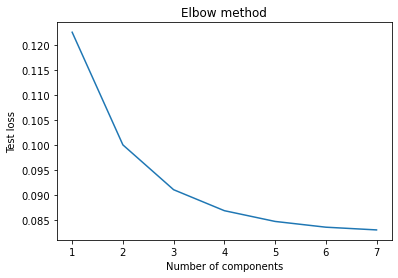

In [5]:
n_comps = np.arange(1, 8)
losses = []
for n in n_comps:
    loss = 0
    for _ in range(3):
        model = neuralnetwork.NeuralNetwork(n_comps=n, n_params=NUM_PARAMS, n_hidden=N_HIDDEN, mixture=MIXTURE, print_info=False)
        neuralnetwork.train_NN(model, train_data1, valid_data1, loss=neuralnetwork.loss_kldivergence, max_rounds=N_ITER, lr=LR, batchsize=BATCHSIZE, print_results=False, print_info=False)
    loss += neuralnetwork.mean_loss(X_test, y_test, model, loss=neuralnetwork.loss_hellinger).detach().item()
    losses.append(loss/3)
    print(f'Computed loss with {n} components - average loss = {loss/3}.')
plt.plot(n_comps, losses)
plt.xlabel('Number of components')
plt.ylabel('Testing loss')
plt.title('Elbow of a curve method')
plt.show()

In [5]:
N_COMPS = 4

## Training models

We train 3 different models to compare their accuracy.

In [6]:
model1 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS, mixture=MIXTURE)
model2 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS, mixture=MIXTURE)
model3 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS, mixture=MIXTURE)

Mixture Density Network created.
Mixture Density Network created.
Mixture Density Network created.


In [7]:
train_losses1, valid_losses1 = neuralnetwork.train_NN(model1, train_data1, valid_data1, loss=neuralnetwork.loss_kldivergence, max_rounds=N_ITER, lr=LR, batchsize=BATCHSIZE)
train_losses2, valid_losses2 = neuralnetwork.train_NN(model2, train_data2, valid_data2, loss=neuralnetwork.loss_kldivergence, max_rounds=N_ITER, lr=LR, batchsize=BATCHSIZE)
train_losses3, valid_losses3 = neuralnetwork.train_NN(model3, train_data3, valid_data3, loss=neuralnetwork.loss_kldivergence, max_rounds=N_ITER, lr=LR, batchsize=BATCHSIZE)

Training ...: 100%|█████████▉| 299/300 [14:06<00:02,  2.83s/it]


Learning rate: 2.741531724392847e-08,
Train loss: 0.16188770532608032,
 Valid loss: 0.16735616326332092


Training ...: 100%|█████████▉| 299/300 [14:28<00:02,  2.90s/it]


Learning rate: 2.741531724392847e-08,
Train loss: 0.16046582162380219,
 Valid loss: 0.16611792147159576


Training ...: 100%|█████████▉| 299/300 [15:53<00:03,  3.19s/it]

Learning rate: 2.741531724392847e-08,
Train loss: 0.1591794788837433,
 Valid loss: 0.1609911173582077


In [8]:
# Compute losses

print("Training dataset")
print(f"KLD : {neuralnetwork.mean_loss(X_train1, y_train1, model1, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_train1, y_train1, model1, loss=neuralnetwork.loss_hellinger)}')

print("\nValidation dataset")
print(f"KLD : {neuralnetwork.mean_loss(X_valid1, y_valid1, model1, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_valid1, y_valid1, model1, loss=neuralnetwork.loss_hellinger)}')

print("\nTest dataset")
print(f"KLD : {neuralnetwork.mean_loss(X_test, y_test, model1, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_test, y_test, model1, loss=neuralnetwork.loss_hellinger)}')


Training dataset
KLD : 0.16188770532608032
Hellinger : 0.17510473728179932

Validation dataset
KLD : 0.16735616326332092
Hellinger : 0.17681576311588287

Test dataset
KLD : 0.16024450957775116
Hellinger : 0.1746215671300888


## Distributions plot

To compare predicted distributions to the theoretical ones. Given an initial condition r = 5, the population of $S$ at any later time is a random integer sampled from a Negative Binomial distribution:
$$f(x, t, \theta) = \binom{k + r - 1}{r-1} (1-e^{-t\theta})^k(e^{-t\theta})^r$$


In [21]:
def explosive_production_distribution(x, params, r=INIT_STATE):
    if x < r:
        return 0
    else:
        t, theta = params
        return nbinom.pmf(x-r, r, np.exp(-t*theta))

In [22]:
NAME = 'Explosive Production CRN'

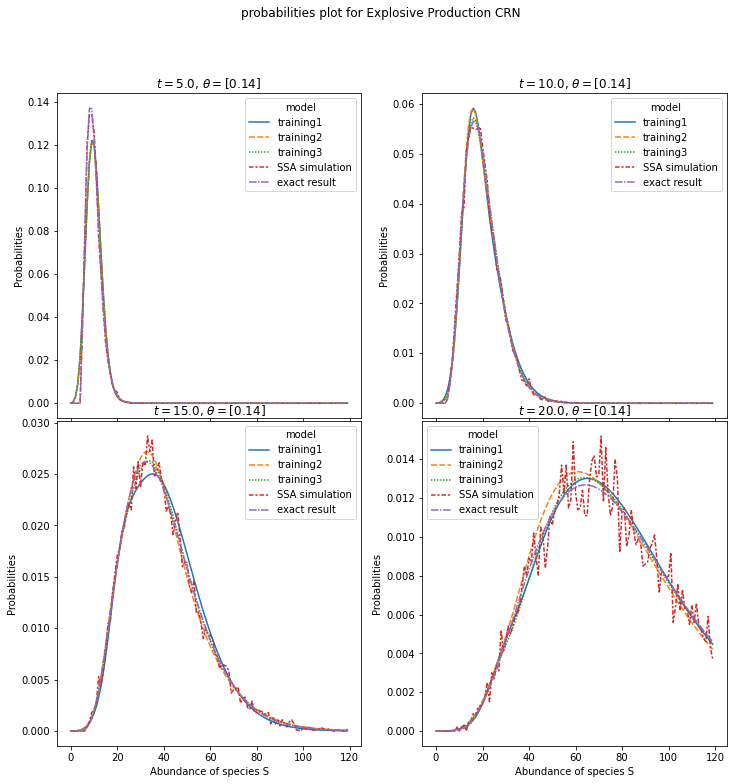

In [23]:
plot.multiple_plots(to_pred=[X_test[992+k,:] for k in range(4)], 
                models=[model1, model2, model3], 
                up_bound=[120]*4, 
                n_comps=N_COMPS,
                plot_exact_result=(True, explosive_production_distribution),
                plot_test_result=(True, [y_test[992+k, :] for k in range(4)]), 
                save=(False, '4distributions.png'),
                crn_name=NAME)

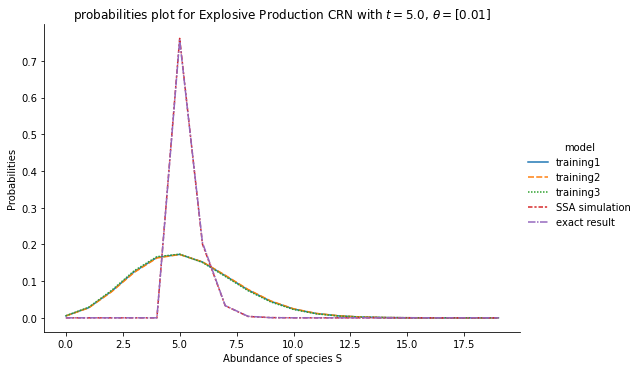

In [39]:
index = 100
plot.plot_model(to_pred=X_test[index,:], 
                models=[model1, model2, model3], 
                up_bound=20, 
                n_comps=N_COMPS,
                plot_exact_result=(True, explosive_production_distribution),
                plot_test_result = (True, y_test[index, :]), 
                save=(False, 'interesting.png'),
                crn_name=NAME)

We can check the accuracy for higher times than those of the traning:

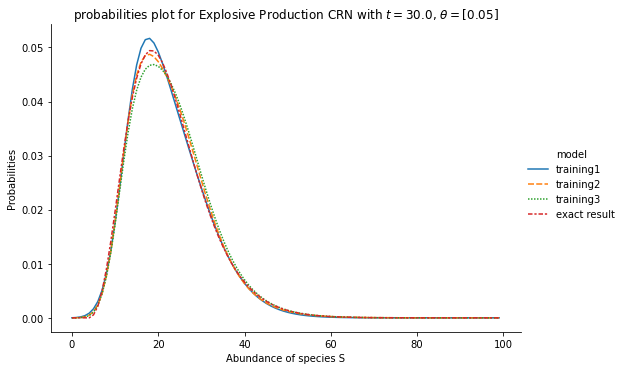

In [25]:
plot.plot_model(to_pred=torch.tensor([30., 0.05]), 
                models=[model1, model2, model3], 
                up_bound = 100, 
                n_comps=N_COMPS,
                plot_exact_result=(True, explosive_production_distribution),
                confidence_interval=False, 
                save=(False, "t30c005.png"),
                crn_name=NAME)

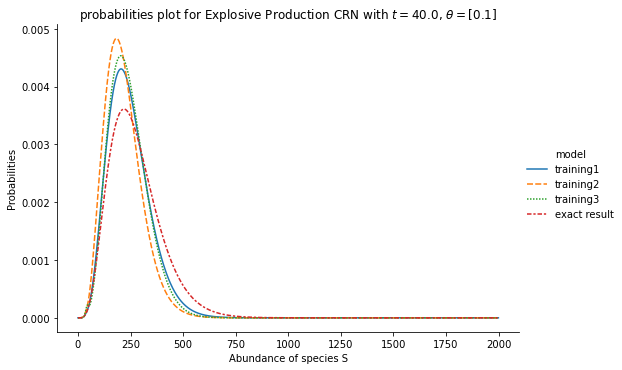

In [38]:
plot.plot_model(to_pred=torch.tensor([40., 0.1]), 
                models=[model1, model2, model3], 
                up_bound = 2000, 
                n_comps=N_COMPS,
                plot_exact_result=(True, explosive_production_distribution),
                save=(False, 'interesting2.png'),
                crn_name=NAME)

We can also check the accuracy for parameters outside the bounds of the training.

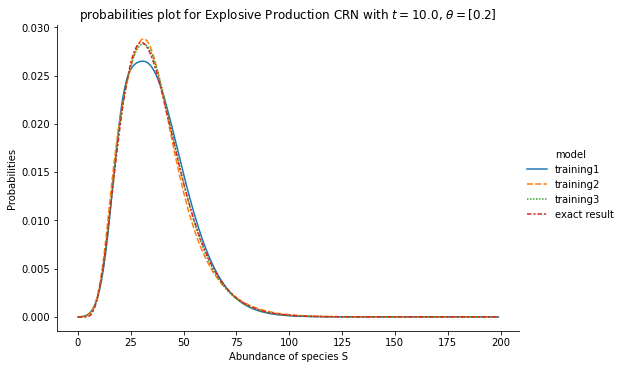

In [27]:
plot.plot_model(to_pred=torch.tensor([10., 0.2]), 
                models=[model1, model2, model3], 
                up_bound = 200, 
                n_comps=N_COMPS,
                plot_exact_result=(True, explosive_production_distribution),
                confidence_interval=False, 
                save=(False, 'distribution_t10c02.png'),
                crn_name=NAME)

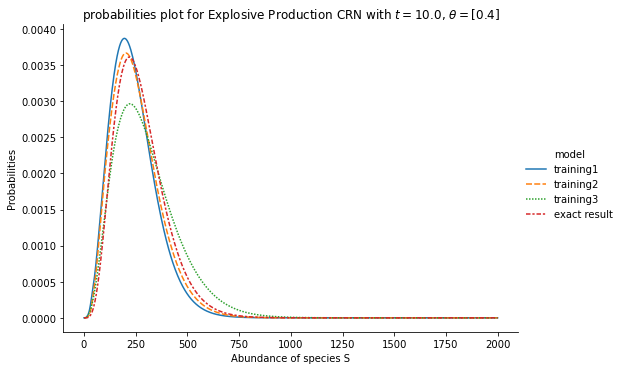

In [36]:
plot.plot_model(to_pred=torch.tensor([10., 0.4]), 
                models=[model1, model2, model3], 
                up_bound = 2000,
                n_comps=N_COMPS,
                plot_exact_result=(True, explosive_production_distribution),
                crn_name=NAME)

## Sensitivities plot

To compute sensitivities and compare them to the theoretical ones.

$$\nabla_\theta  f(k, r, \theta , t) = \binom{k+r-1}{r-1} e^{-\theta tr}(1-e^{-\theta t})^{k-1}t(ke^{-\theta t}-(1-e^{-\theta t})r)$$

In [29]:
def explosive_production_stv(k, params, r=INIT_STATE):
    if k < r:
        return 0
    else:
        t, theta = params
        return comb(k-1, r-1) * np.exp(-theta*t*r) * (1-np.exp(-theta*t))**(k-r-1) * t * ((k-r)*np.exp(-theta*t) - (1-np.exp(-theta*t))*r)

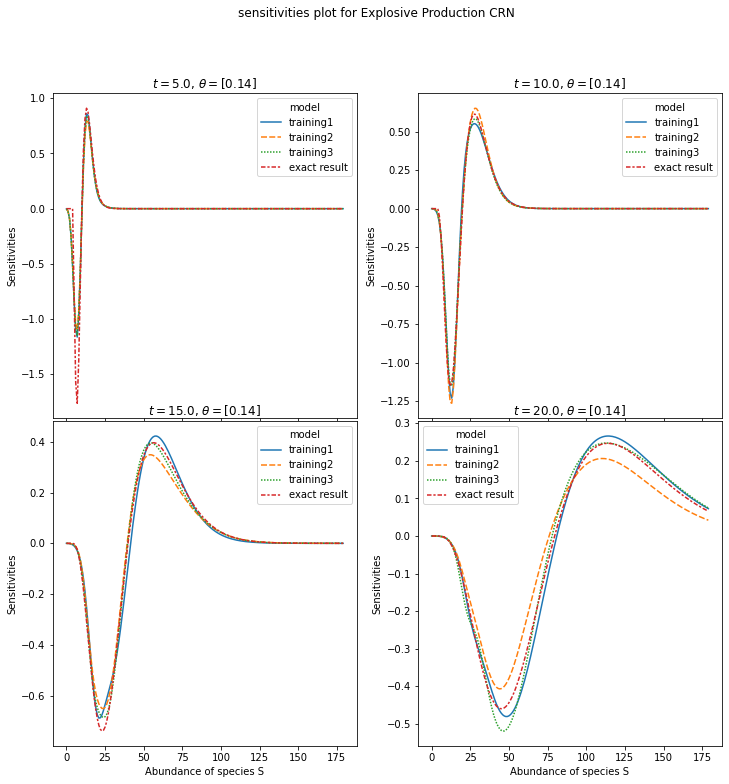

In [31]:
plot.multiple_plots(to_pred=[X_test[992+k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound = [180]*4, 
                    n_comps=N_COMPS,
                    plot_exact_result=(True, explosive_production_stv),
                    index_names = ('Sensitivities', 'Abundance of species S'), 
                    plot=('sensitivities', 0), 
                    save=(True, 'sensitivities_4distributions.png'),
                    crn_name=NAME)

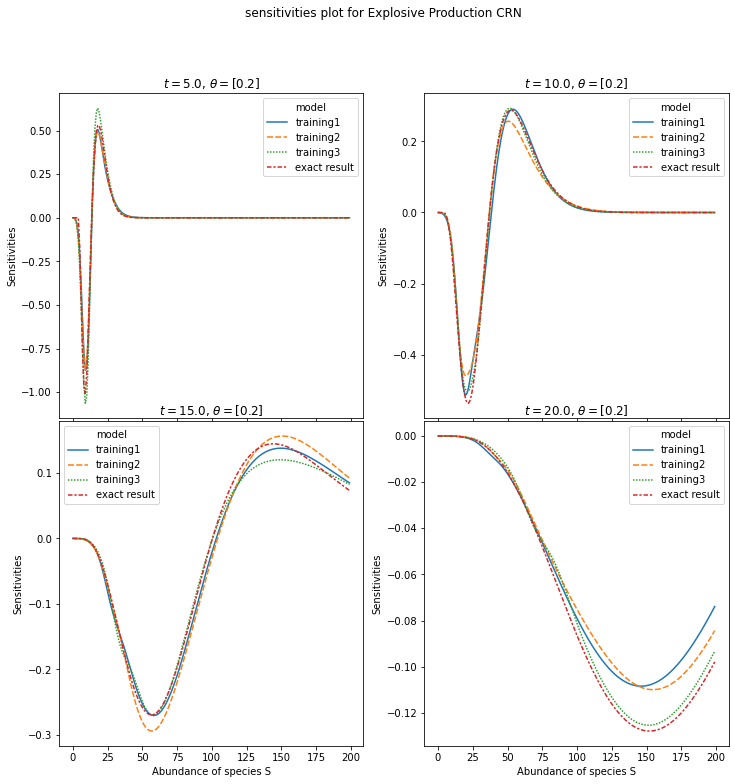

In [33]:
plot.multiple_plots(to_pred=[torch.tensor([5*(k+1), 0.2]) for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound = [200]*4, 
                    n_comps=N_COMPS,
                    plot_exact_result=(True, explosive_production_stv),
                    index_names = ('Sensitivities', 'Abundance of species S'), 
                    plot=('sensitivities', 0), 
                    save=(True, 'sensitivities_4distributions.png'),
                    crn_name=NAME)

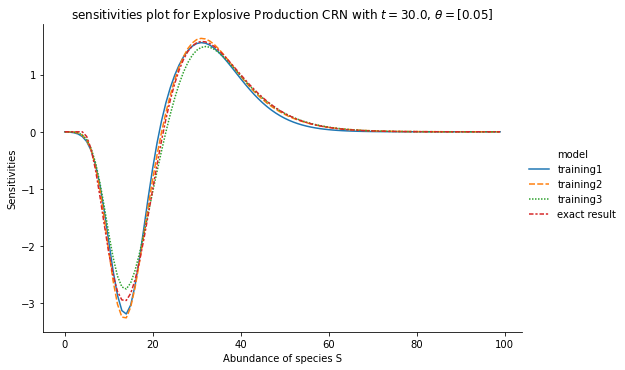

In [34]:
plot.plot_model(to_pred=torch.tensor([30., 0.05]), 
                models=[model1, model2, model3], 
                up_bound=100, 
                n_comps=N_COMPS,
                plot_exact_result=(True, explosive_production_stv),
                index_names = ('Sensitivities', 'Abundance of species S'), 
                plot=('sensitivities', 0), 
                save=(True, 'sensitivities_t30c005.png'),
                crn_name=NAME)

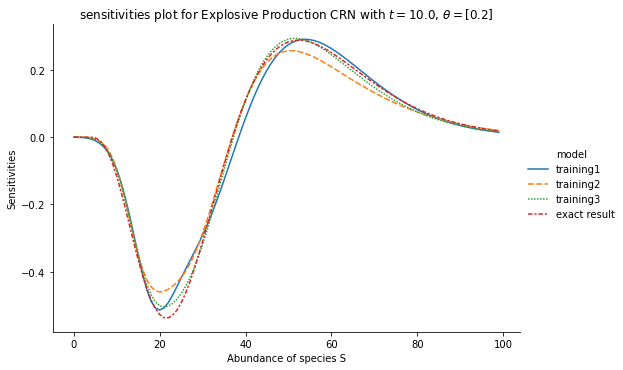

In [35]:
plot.plot_model(to_pred=torch.tensor([10., 0.2]), 
                models=[model1, model2, model3], 
                up_bound=100, 
                n_comps=N_COMPS,
                plot_exact_result=(True, explosive_production_stv),
                index_names = ('Sensitivities', 'Abundance of species S'), 
                plot=('sensitivities', 0), 
                save=(True, 'sensitivities_t10c02.png'),
                crn_name=NAME)

## Fisher Information

In [105]:
def exact_fi(t, params, r=INIT_STATE, up_bound=1_000):
    theta = params[0]
    res = 0
    for k in range(up_bound):
        res += explosive_production_distribution(k, t, theta, r)*t**2*(k/(np.exp(theta*t)-1)-r)**2
    return res

/var/folders/tq/795v7745669dnb2z48kn2vzw0000gn/T/ipykernel_51611/2058998717.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  to_pred = torch.concat((torch.tensor([t]), torch.tensor(params)))


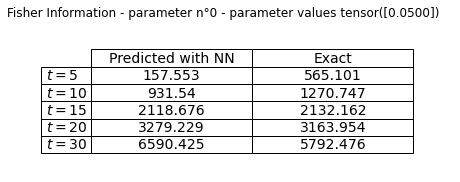

In [108]:
plot.fi_table(time_samples=[5, 10, 15, 20, 30], 
            params=torch.tensor([0.05]), 
            ind_param=0, 
            models=(True, [model1, model2, model3], N_COMPS), 
            plot_exact=(True, exact_fi),
            plot_fsp=(True, propensities.stoich_mat, propensities.propensities, 50, None),
            crn_name=NAME)

/var/folders/tq/795v7745669dnb2z48kn2vzw0000gn/T/ipykernel_51611/2058998717.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  to_pred = torch.concat((torch.tensor([t]), torch.tensor(params)))


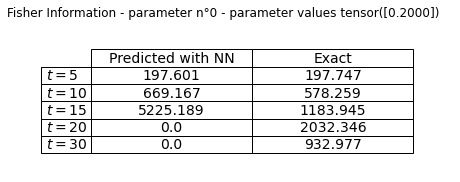

In [109]:
plot.fi_table(time_samples=[5, 10, 15, 20, 30], 
            params=torch.tensor([0.2]), 
            ind_param=0, 
            models = (True, [model1, model2, model3], N_COMPS), 
            plot_exact=(True, exact_fi),
            plot_fsp=(True, propensities.stoich_mat, propensities.propensities, 100, None),
            crn_name=NAME)